In [54]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt

In [55]:

con = cx_Oracle.connect('txp9730/Khdbshs4sfd76sf@//acaddbprod.uta.edu:1523/pcse1p.data.uta.edu')
cur = con.cursor()

In [56]:
cur.execute("alter session set current_schema=sharmac")

In [57]:
cur.execute("""select startyear, genres, count(tconst)
                from title_basics
                where lower(genres) in ('comedy','horror','sci-fi') and titletype='movie' and startyear between '2000' and '2015'
                group by startyear, genres
                order by startyear, genres""")
result=cur.fetchall()

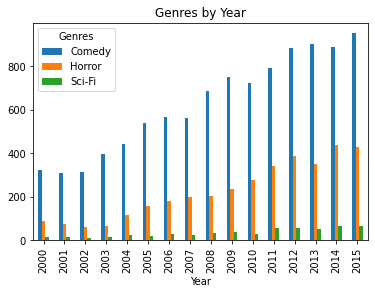

In [59]:
df_ana1=pd.DataFrame(result,columns=['Year','Genres','Total_movies'])
df=pd.pivot_table(df_ana1, values='Total_movies', columns=['Genres'],index=['Year'])
df.plot.bar()
plt.title("Genres by Year")
plt.savefig('Analysis1.png')

In [ ]:
cur.execute("""select Primarytitle, Startyear, genres, primaryname
               from TITLE_BASICS t join TITLE_crew_dir td on t.TCONST=td.TCONST
                                   join NAME_TITLE_MAPPING nt on t.TCONST=nt.TCONST
                                   join NAME_BASICS nb on nt.NCONST=nb.NCONST
               where td.directors=nt.NCONST and titletype='movie' and lower(Startyear) != '\n'
                                         and lower(genres)='comedy'""")
result=cur.fetchall()
df_ana2=pd.DataFrame(result,columns=['Title','Year','Genre','Name'])

In [ ]:
df_ana2.head()


In [ ]:
cur.execute("""select tb.Startyear, count(tb.Tconst)
             from TITLE_BASICS tb join TITLE_PRINCIPALS nt on tb.Tconst=nt.Tconst
             where nt.Nconst = 'nm0000168' and lower(tb.startyear) not like '%\n%' and tb.startyear between '1999' and '2009'
             group by tb.startyear
             order by tb.startyear""")
result=cur.fetchall()
df_ana3=pd.DataFrame(result,columns=['Startyear','Count'])

In [ ]:
fig, ax = plt.subplots()
df_ana3.plot(x='Startyear', kind='bar', ax=ax)
ax.legend(["Number of movies"])
plt.title("Samuel L. Jackson movies")
plt.savefig('Analysis3a.jpeg')

In [ ]:
cur.execute("""select tb.Startyear, count(tb.Tconst)
                from TITLE_BASICS tb join TITLE_PRINCIPALS nt on tb.Tconst=nt.Tconst
                where nt.Nconst = 'nm0000098' and lower(tb.startyear) not like '%\n%' and tb.startyear between '1999' and '2009'
                group by tb.startyear
                order by tb.startyear""")
result=cur.fetchall()
df_ana4=pd.DataFrame(result,columns=['Startyear','Count'])

In [ ]:
#df_ana4=df_ana4[:-1]

fig, ax = plt.subplots()
df_ana4.plot(x='Startyear', kind='bar', ax=ax)
ax.legend(["Number of movies"])
plt.title("Jennifer Aniston movies")
plt.savefig('Analysis3b.jpeg')

In [ ]:
df_ana1.to_csv('Analysis1.csv', index=False)
df_ana2.to_csv('Analysis2.csv', index=False)
df_ana3.to_csv('Analysis3a.csv', index=False)
df_ana4.to_csv('Analysis3b.csv', index=False)
